In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/creditcard.csv")

# getting information about dataset
print(df.shape)
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


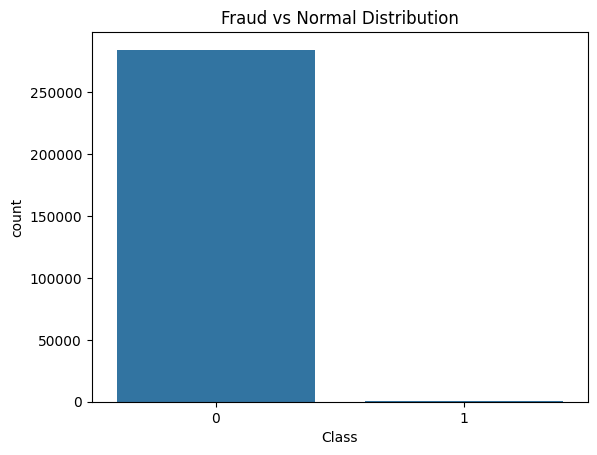

In [50]:
# Fraudulent transaction distribution
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Normal Distribution")
plt.show()

the above countplot clearly shows that the Dataset is Extremely unbalanced

- 1: Fraud
- 0: Normal

<Axes: xlabel='Time', ylabel='Amount'>

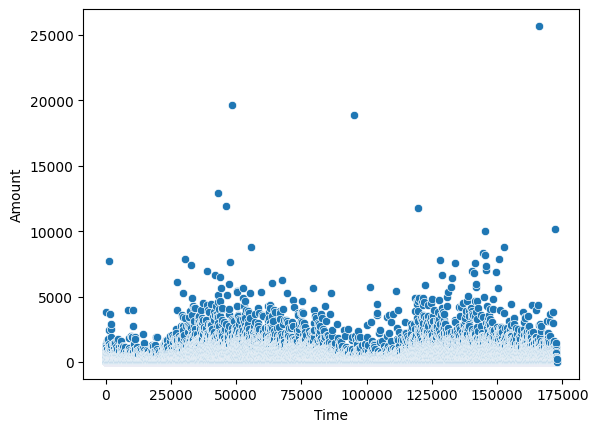

In [51]:
sns.scatterplot(x='Time',y='Amount',data=df)

In [52]:
fraud= df[df['Class']==1]
normal= df[df['Class']==0]
N=100
fraud_sample= fraud.sample(N,random_state=1)
normal_sample= normal.sample(N,random_state=1)

fraud_mean=fraud_sample.drop('Class',axis=1).mean()
normal_mean=normal_sample.drop('Class',axis=1).mean()

fraud_sample.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,84611.490000,-4.946408,3.795105,-7.617750,4.815073,-3.085580,-1.672192,-5.984372,0.645840,-2.679431,...,0.891935,-0.077383,-0.145462,-0.104847,-0.040533,0.017411,0.117358,0.069209,89.274200,1.0
std,46466.551756,6.580627,4.325998,6.712421,2.736042,5.756573,1.916952,7.007526,6.823926,2.273148,...,4.140470,1.555306,2.054548,0.490211,0.895812,0.442234,1.345575,0.493693,201.836198,0.0
min,7519.000000,-26.457745,-8.402154,-30.177317,-0.475243,-17.892600,-6.406267,-31.197329,-37.353443,-9.462573,...,-8.755698,-8.887017,-15.981649,-1.632653,-3.536716,-1.152671,-7.263482,-1.552593,0.000000,1.0
25%,43239.000000,-8.007196,1.475222,-9.786671,3.126547,-5.505258,-2.865032,-9.922738,-0.195336,-3.899818,...,0.014107,-0.606334,-0.342304,-0.423552,-0.511954,-0.263932,-0.006025,-0.119214,1.000000,1.0
50%,87011.000000,-2.400534,3.088129,-5.686442,4.394148,-1.223955,-1.640056,-2.972294,0.673819,-2.256527,...,0.574101,0.037568,-0.047634,-0.063154,0.040564,0.006522,0.425011,0.188549,8.590000,1.0
75%,125623.500000,-0.227242,5.395080,-3.075724,6.274235,0.545044,-0.743747,-1.659632,1.648592,-1.179336,...,1.178826,0.720014,0.239743,0.282553,0.491613,0.407004,0.737626,0.385049,99.990000,1.0
max,169351.000000,1.954852,16.497472,1.984405,11.345120,11.095089,5.760059,3.791907,14.955107,1.992110,...,27.202839,3.460893,5.303607,0.789186,1.605056,1.075295,2.262942,0.939407,1354.250000,1.0


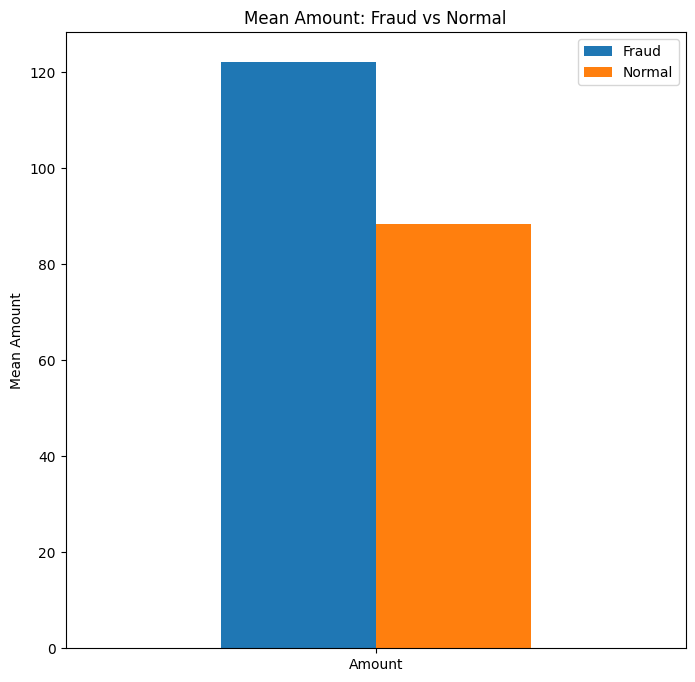

In [53]:
# Showing difference between average Amount withdrawn
Amt_means = pd.DataFrame({
    "Fraud": fraud[["Amount"]].mean(),
    "Normal": normal[[ "Amount"]].mean()
})

Amt_means.plot(kind="bar", figsize=(8,8))
plt.title("Mean Amount: Fraud vs Normal")
plt.ylabel("Mean Amount")
plt.xticks(rotation=0)
plt.show()

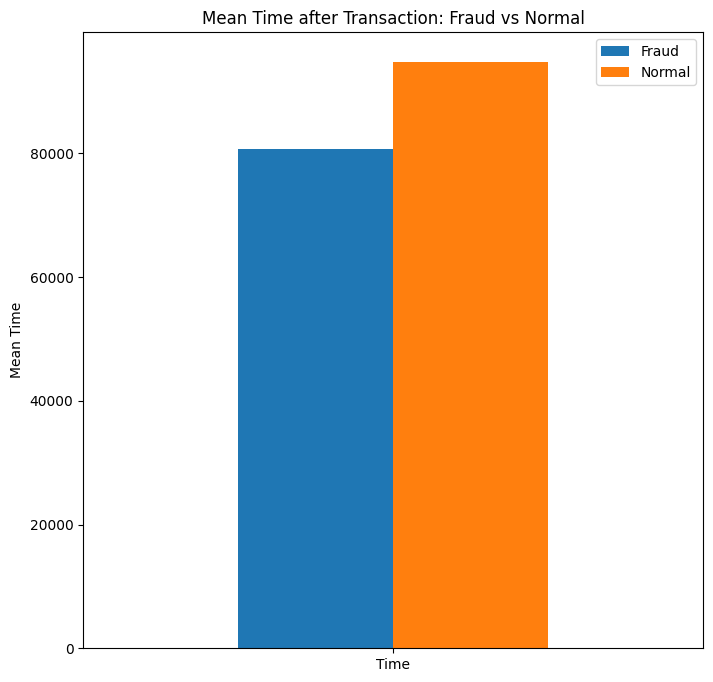

In [54]:
# Showing difference between average Time between transactions
time_means = pd.DataFrame({
    "Fraud": fraud[["Time"]].mean(),
    "Normal": normal[[ "Time"]].mean()
})
time_means.plot(kind="bar", figsize=(8,8))
plt.title("Mean Time after Transaction: Fraud vs Normal")
plt.ylabel("Mean Time")
plt.xticks(rotation=0)
plt.show()